In [244]:
## importing all imporatant labs


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
from sklearn.preprocessing import StandardScaler  ## preprocessiong
from sklearn.model_selection import train_test_split
## Algos
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV




In [245]:
data = pd.read_csv('C:/Users/himan/OneDrive/Desktop/Diabetes Project/Data/diabetes.csv')

In [246]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [247]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [248]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [249]:
data.duplicated().sum()

0

In [250]:
for i in data.columns:
    if i == 'Pregnancies':
        continue
    else:
        data[i] = data[i].replace(0,data[i].median())


In [251]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot: >

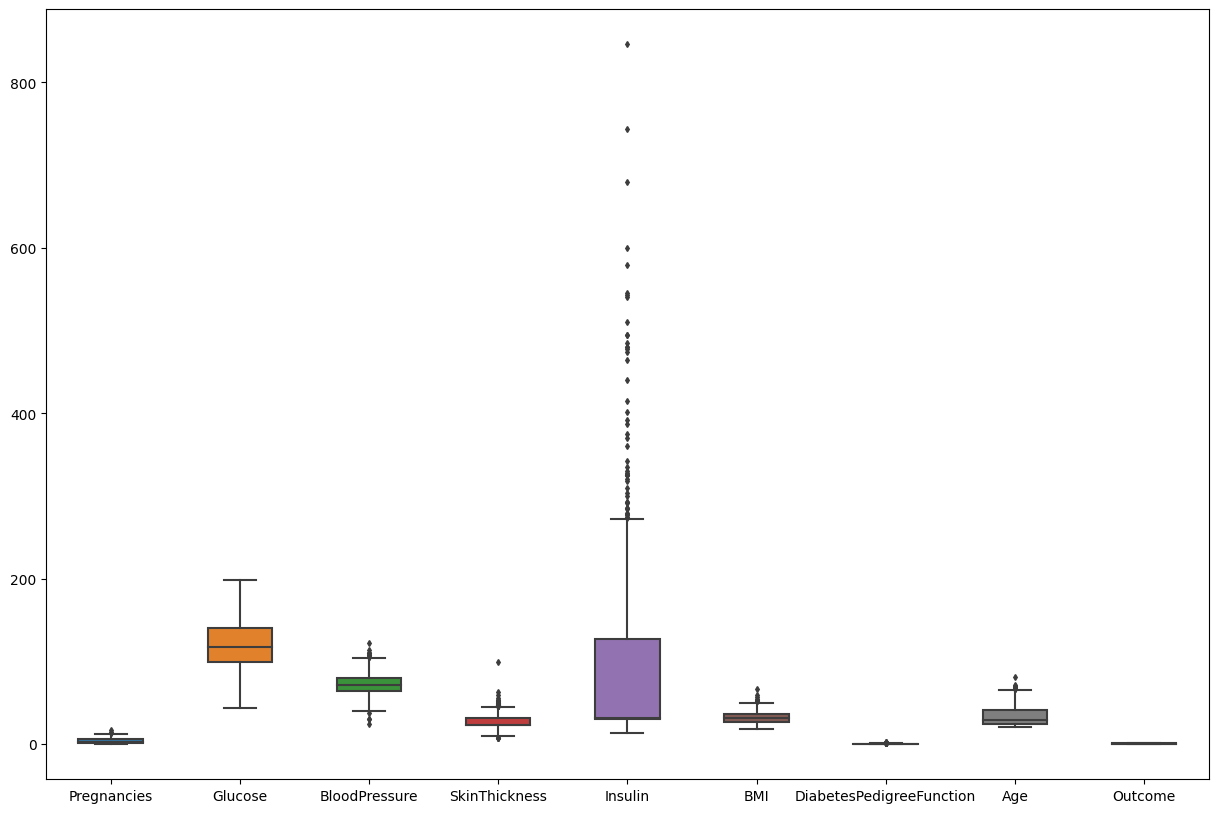

In [252]:
plt.figure(figsize=(15,10))
sns.boxplot(data,width=0.5,fliersize=3)

In [253]:
X = data.drop(columns=['Outcome'])
y = data['Outcome']

In [254]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3)

In [255]:
def Standard_scalar(X_train,y_train):
    scalar = StandardScaler()
    X_train_scalad  = scalar.fit_transform(X_train)
    X_test_scalad = scalar.transform(X_test)

    file = open('C:/Users/himan/OneDrive/Desktop/Diabetes Project/Model/Scalar.pkl','wb')
    pickle.dump(scalar,file)
    file.close()

    return X_train_scalad,X_test_scalad


In [256]:
X_train_scalad,X_test_scalad = Standard_scalar(X_train,X_test)
X_test_scalad,X_train_scalad

(array([[ 0.69748316, -0.7949252 , -1.167243  , ...,  0.24811779,
         -0.11680393,  0.85019217],
        [-0.52953881, -0.33002846,  0.2269427 , ...,  0.49243527,
         -0.94192338, -1.03426754],
        [-0.52953881, -0.4628561 , -0.67517745, ..., -0.21177393,
         -0.91266382, -1.03426754],
        ...,
        [-1.14304979,  0.1680752 ,  0.63699732, ...,  0.57866496,
          0.97750343, -0.86295302],
        [ 0.69748316, -0.56247683, -0.18311191, ..., -0.21177393,
         -1.01799822,  0.33624861],
        [ 0.39072767, -1.49227032,  0.80101917, ...,  0.50680688,
         -0.91851573,  0.16493409]]),
 array([[-0.8362943 , -0.89454593, -1.00322115, ..., -1.20341544,
         -0.61421636, -0.94861028],
        [ 0.39072767, -0.56247683, -0.01909007, ...,  0.66489466,
         -0.90973787, -0.43466673],
        [-1.14304979,  0.43373048, -0.34713376, ...,  1.44096193,
         -0.30699103, -0.77729576],
        ...,
        [ 1.92450513, -0.69530447,  1.12906286, ...,  

In [257]:
warnings.filterwarnings('ignore')

## Decision tree Hypertuning


parameter = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
    }

In [258]:
clf= DecisionTreeClassifier()

## Gridcv

gdv = GridSearchCV(clf,param_grid=parameter,cv=5,verbose=3,scoring=accuracy_score)

gdv.fit(X_train,y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring=<function accuracy_score at 0x000001B0A2995580>,
             verbose=3)

In [259]:
gdv.best_params_

{'criterion': 'gini',
 'max_depth': 1,
 'max_features': 'auto',
 'splitter': 'best'}

In [260]:
classifier = DecisionTreeClassifier(max_depth=1,max_features='auto',criterion='gini',splitter='best')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)




In [261]:
def confusion_mat(y_test,y_pred):
    conf_mat = confusion_matrix(y_test,y_pred)
    TP=conf_mat[0][0]
    FN=conf_mat[1][0]
    FP=conf_mat[0][1]
    TN = conf_mat[1][1]

    print(conf_mat)

    accuracy = (TP+TN)/(TP+TN+FN+FP) 
    print("Accuracy:",accuracy*100,"%")

    precision = TP/(TP + FP)   #precision is the ratio of correctly predicted positive observations to the total predicted positive observations.
    print('Precision:',precision*100,'%')
   
    Recall = TP/(TP+FN) # how many of the positive cases the classifier correctly predicted over all posostive cases of data.
    print("Recall",Recall)

    F1_score = 2*(Recall * precision) / (Recall+precision)
    print ("F1 score : ",F1_score,"\n")


In [262]:
confusion_mat(y_test,y_pred)

[[139  12]
 [ 53  27]]
Accuracy: 71.86147186147186 %
Precision: 92.05298013245033 %
Recall 0.7239583333333334
F1 score :  0.8104956268221574 



In [263]:


## Support Vector Classifier With Hyperparameter Tuning

# defining parameter range
parameter = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear','rbf','polynomial']
              }

In [264]:
gdsvc = GridSearchCV(SVC(),param_grid=parameter,cv=3,refit=True,scoring=accuracy_score,verbose=3)
gdsvc.fit(X_train,y_train)


Fitting 3 folds for each of 45 candidates, totalling 135 fits
[CV 1/3] END .......C=0.1, gamma=1, kernel=linear;, score=nan total time=   0.0s
[CV 2/3] END .......C=0.1, gamma=1, kernel=linear;, score=nan total time=   0.0s
[CV 3/3] END .......C=0.1, gamma=1, kernel=linear;, score=nan total time=   0.0s
[CV 1/3] END ..........C=0.1, gamma=1, kernel=rbf;, score=nan total time=   0.0s
[CV 2/3] END ..........C=0.1, gamma=1, kernel=rbf;, score=nan total time=   0.0s
[CV 3/3] END ..........C=0.1, gamma=1, kernel=rbf;, score=nan total time=   0.0s
[CV 1/3] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 2/3] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 3/3] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 1/3] END .....C=0.1, gamma=0.1, kernel=linear;, score=nan total time=   0.0s
[CV 2/3] END .....C=0.1, gamma=0.1, kernel=linear;, score=nan total time=   0.0s
[CV 3/3] END .....C=0.1, gamma=0.1, kernel=line

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'polynomial']},
             scoring=<function accuracy_score at 0x000001B0A2995580>,
             verbose=3)

In [265]:
gdsvc.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [266]:
svc = SVC(C=0.1,gamma=1,kernel='linear')
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
print('Accuracy of Support Vector Machine classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))


Accuracy of Support Vector Machine classifier on test set: 0.74


In [267]:
confusion_mat(y_test,y_pred)

[[125  26]
 [ 33  47]]
Accuracy: 74.45887445887446 %
Precision: 82.78145695364239 %
Recall 0.7911392405063291
F1 score :  0.8090614886731392 



In [268]:
file = open('C:/Users/himan/OneDrive/Desktop/Diabetes Project/Model/classifier.pkl','wb')
pickle.dump(classifier, file)
file.close()

In [269]:
ber_nb = BernoulliNB()
ber_nb.fit(X_train,y_train)

y_pred = ber_nb.predict(X_test)

confusion_mat(y_test,y_pred)


[[151   0]
 [ 80   0]]
Accuracy: 65.36796536796537 %
Precision: 100.0 %
Recall 0.6536796536796536
F1 score :  0.7905759162303665 

